In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data/LordsMobileVN.xlsx')

# Phân tích bài viết

In [3]:
df_post = df
df_post['reactions'] = df_post['reactions'].apply(lambda x : dict(eval(x)) )
df_post_1 = df_post['reactions'].apply(pd.Series )
# Merge cột vào dataframe
df_post_2 = pd.concat([df_post, df_post_1], axis=1).drop('reactions', axis=1)
df_post_2= df_post_2.fillna(0)
df_post_2[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]


C:\Users\nhuyh\AppData\Local\Temp\ipykernel_12016\2000623767.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_post_1 = df_post['reactions'].apply(pd.Series )


,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,54.0,4.0,1.0,0.0,0.0,0.0,0.0,2,4,59
1,"🥹 Không có so sánh, không có đau thương",97.0,0.0,25.0,0.0,0.0,0.0,0.0,1,17,122
2,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",130.0,3.0,30.0,1.0,1.0,0.0,0.0,0,22,165
3,0,91.0,2.0,6.0,0.0,0.0,0.0,0.0,0,17,99
4,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\n▪️B...,96.0,2.0,0.0,0.0,0.0,0.0,0.0,1,244,98
...,...,...,...,...,...,...,...,...,...,...,...
194,0,203.0,1.0,148.0,1.0,3.0,1.0,2.0,2,70,359
195,Mời các nông dân vườn khoai trả lời ạ !,183.0,2.0,44.0,2.0,2.0,1.0,0.0,0,79,234
196,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ...",96.0,3.0,27.0,0.0,0.0,0.0,1.0,1,43,127
197,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...,176.0,3.0,164.0,2.0,3.0,0.0,2.0,1,57,350


In [8]:
# Tìm các bài viết chứa 1 từ khóa nào đó

a = df_post_2['post_text'].tolist()
print("có tất cả ", len(a), "bài viết")

res = []

for i in list(a):

    if "Kim Cương" in str(i):
        res.append(i)

print(len(res), "bài viết chứa từ khóa trên")

res


có tất cả  199 bài viết
20 bài viết chứa từ khóa trên


['💎𝗞𝗛𝗨𝗬𝗘̂́𝗡 𝗠𝗔̃𝗜 𝟮𝟬% 𝗞𝗜𝗠 𝗖𝗨̛𝗢̛𝗡𝗚💎\nTừ 10/11/2023 12:00:00 - 11/11/2023 11:59:59 (giờ Việt Nam)\nKhuyến mãi tặng thêm 20% khi mua Kim Cương trên Webpay Gamota (https://pay.gamota.com/game/detail/lordsmobile)\n⚠️Lưu ý:\n- Chỉ áp dụng cho mệnh giá từ 20.000 đến 5 Triệu VNĐ.\n- Chỉ áp dụng cho đơn Nạp đầu tiên trong thời gian khuyến mãi, mỗi người chơi chỉ được khuyến mãi duy nhất một lần, đơn nạp tiếp theo sẽ không được khuyến mãi.\n- Sự kiện chỉ áp dụng cho các gói nạp có giá trị tối đa 5 triệu VND\n- Vui lòng nạp đúng mệnh giá. Nạp sai mệnh giá dẫn đến lỗi nạp sẽ được xử lý sau 3-5 ngày làm việc',
 '💎𝗞𝗛𝗨𝗬𝗘̂́𝗡 𝗠𝗔̃𝗜 𝟮𝟬% 𝗞𝗜𝗠 𝗖𝗨̛𝗢̛𝗡𝗚💎\nTừ 4/11/2023 12:00:00 - 5/11/2023 11:59:59 (giờ Việt Nam)\nKhuyến mãi tặng thêm 20% khi mua Kim Cương trên Webpay Gamota (https://pay.gamota.com/game/detail/lordsmobile)\n⚠️Lưu ý:\n- Chỉ áp dụng cho mệnh giá từ 20.000 đến 5 Triệu VNĐ.\n- Chỉ áp dụng cho đơn Nạp đầu tiên trong thời gian khuyến mãi, mỗi người chơi chỉ được khuyến mãi duy nhất một lần, đơn nạp t

In [5]:
# Lấy tất cả các bài viết
df_post_2['post_text']

# Tạo biến text rỗng
text = ""

# Lặp qua tất cả các bài viết
for i in df_post_2['post_text']:

    # Chuyển đổi kiểu dữ liệu của i thành str
    i_str = str(i)

    # Nối i_str vào text
    text = text + i_str + "\n"

# In kết quả
print(text)


Sự hợp tác hoành tráng giữa Lords Mobile x Armored Combat Worldwide đã kết thúc với cuộc đụng độ gay cấn giữa các Bang hội!
Chúng tôi hy vọng bạn thích chứng kiến ngọn lửa của trận chiến thời trung cổ bùng cháy trong suốt sự kiện này. ⚔️🛡️
#LordsMobile #ACW
🥹 Không có so sánh, không có đau thương
Hồi xưa thấy bình thường ha, giờ thì quý lắm luôn 😲😲😲

It was normal in the past, but now it is very precious 😲😲😲
0
🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁
▪️Bước 1: Vào game > trả lời câu hỏi trên ảnh + quýnh giá Ờ-Mây-Zing-Gút Chóp để tham gia sự kiện.
▪️Bước 2: Rung đùi và đợi ngày công bố giải thưởng thôi nè. Quá dễ luôn 😉
💁Lưu ý:
-Giải thưởng cao nhất 10k, thấp nhất 2K Ngọc liên kết.
-Thời gian diễn ra sự kiện: từ 2-4 ngày (Có thể kết thúc sớm nếu đã đủ số lượng người tham gia)
-Các Chúa Tể có thể tham gia nhiều lần để tăng cơ hội nhận giải vì giải thưởng sẽ được quay ngẫu nhiên
-Mọi quyết định cuối cùng sẽ thuộc về BTC
-Giải thưởng sẽ được gửi trực tiếp vào IGG ID của các Chúa Tể nên h

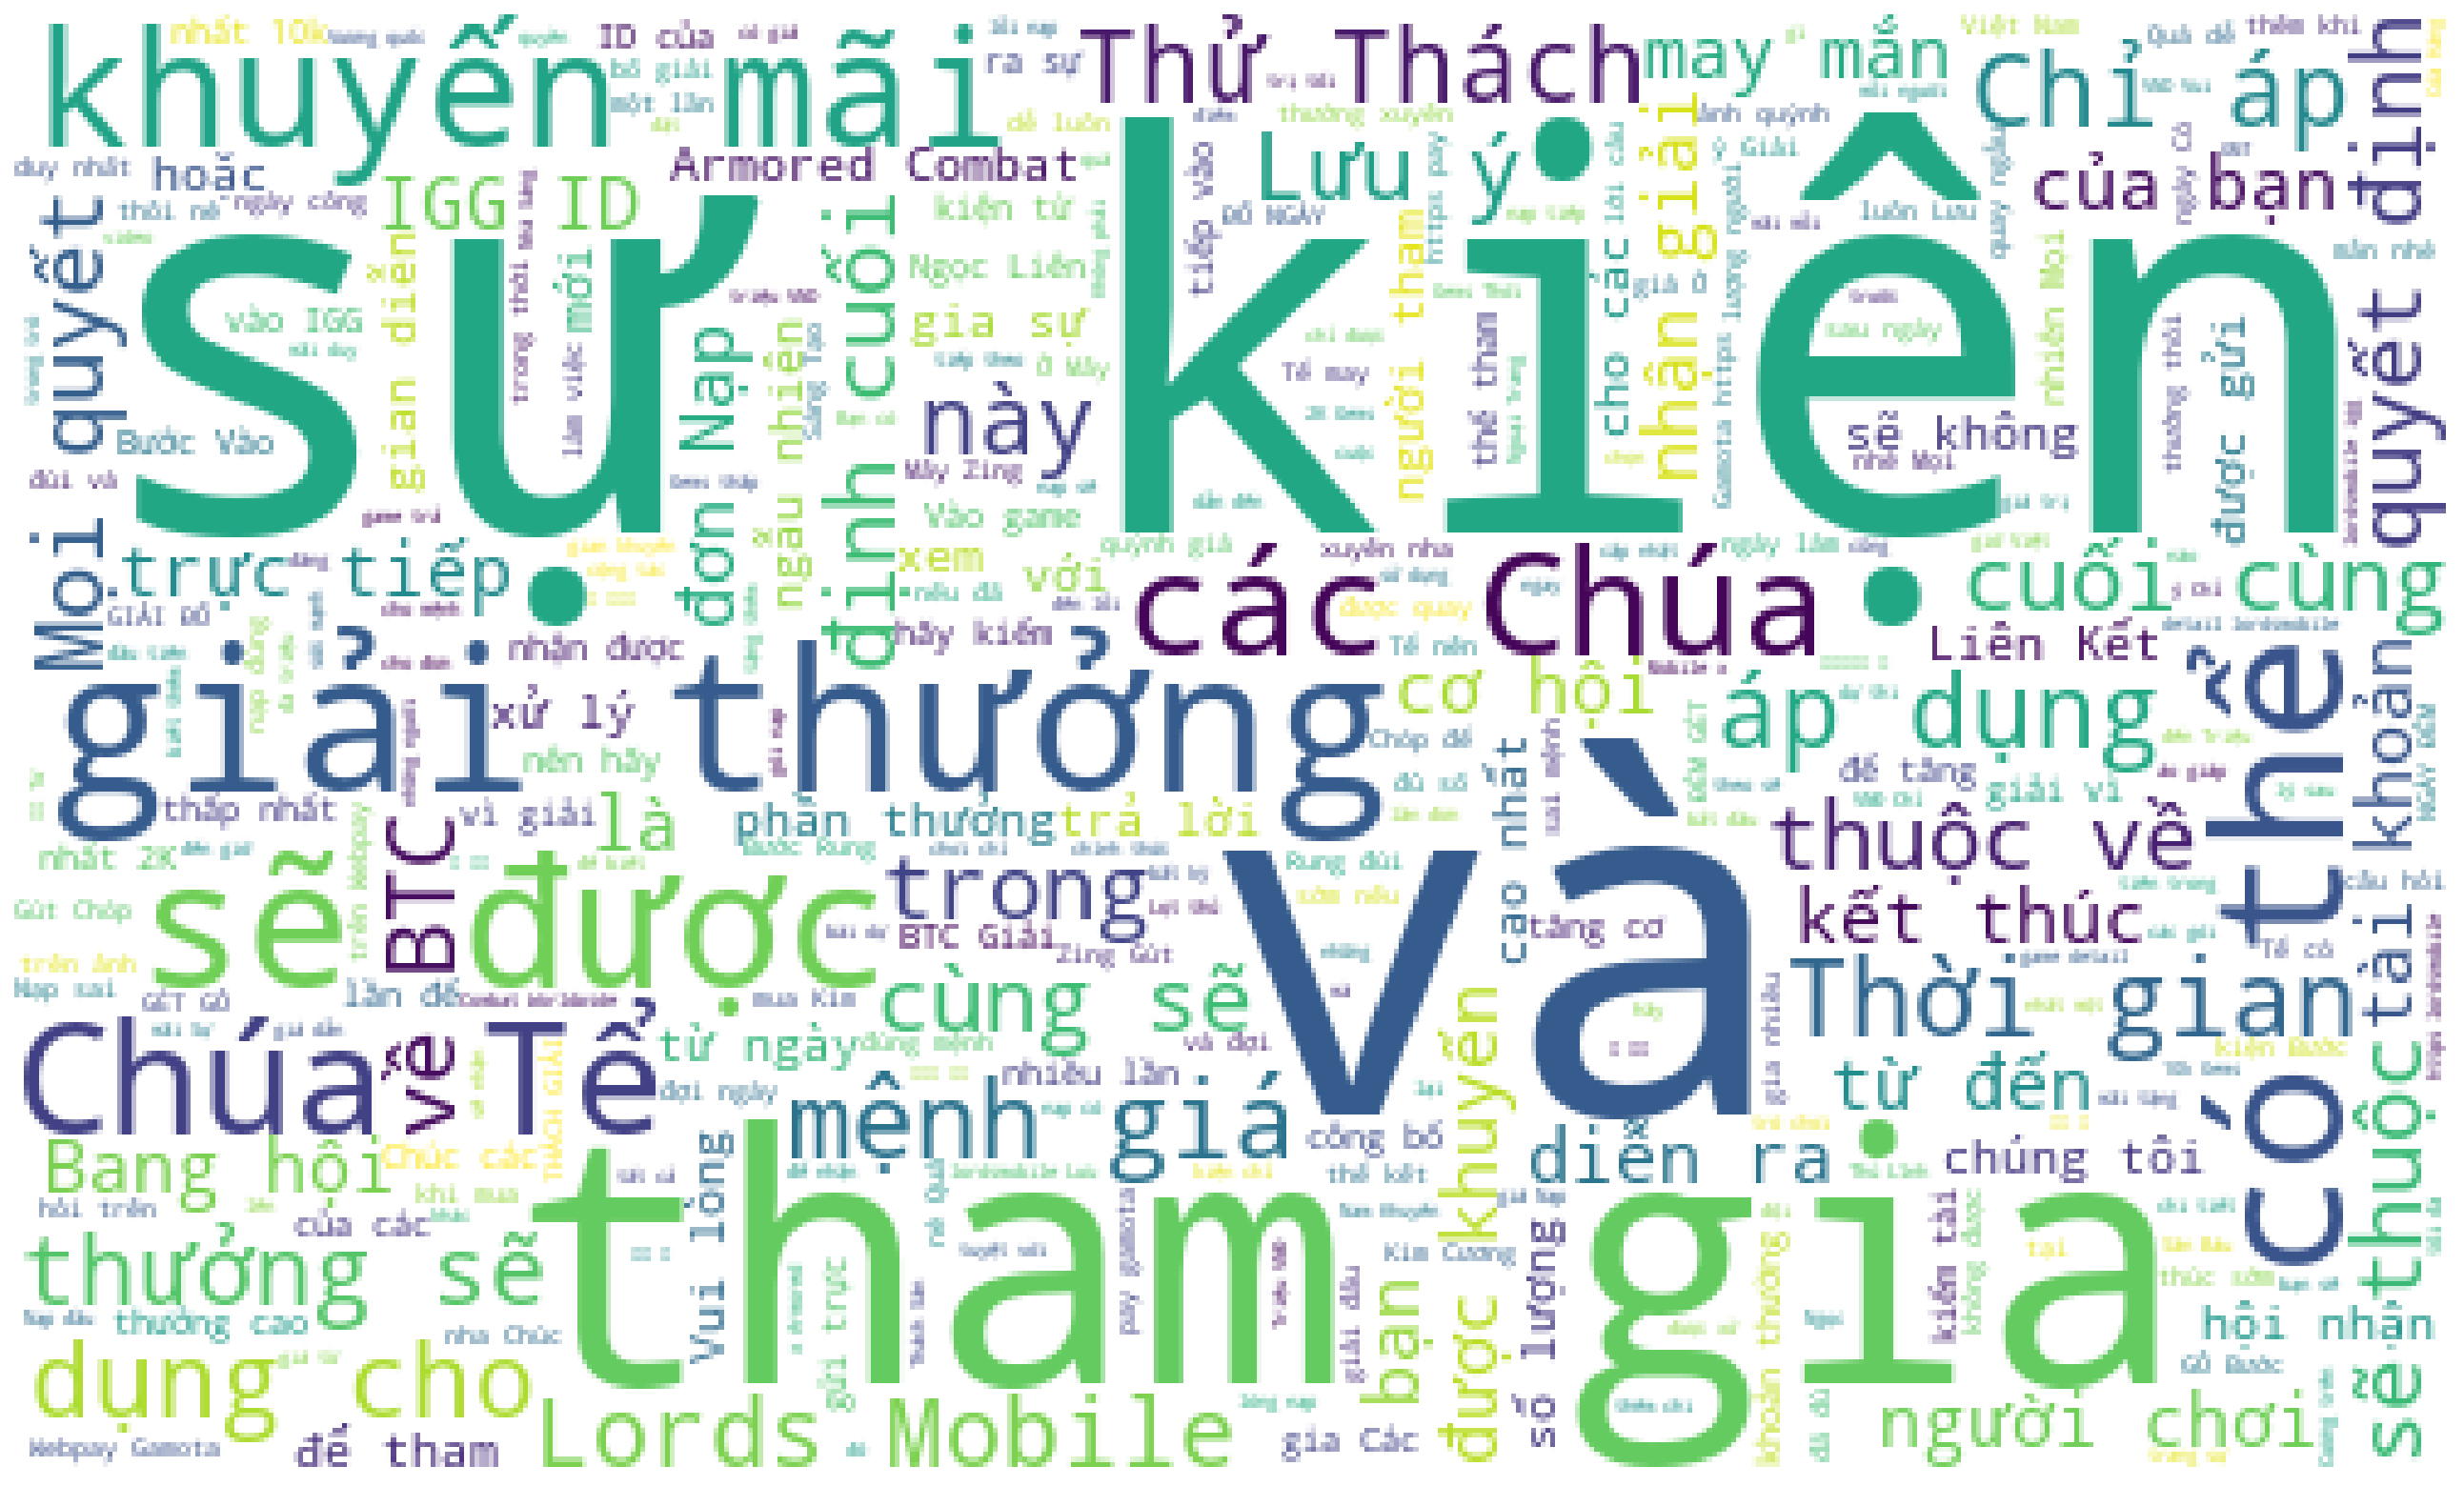

In [6]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [7]:
text_fix=text 
print(len(text))
text

75645


'Sự hợp tác hoành tráng giữa Lords Mobile x Armored Combat Worldwide đã kết thúc với cuộc đụng độ gay cấn giữa các Bang hội!\nChúng tôi hy vọng bạn thích chứng kiến ngọn lửa của trận chiến thời trung cổ bùng cháy trong suốt sự kiện này. ⚔️🛡️\n#LordsMobile #ACW\n\U0001f979 Không có so sánh, không có đau thương\nHồi xưa thấy bình thường ha, giờ thì quý lắm luôn 😲😲😲\n\nIt was normal in the past, but now it is very precious 😲😲😲\n0\n🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\n▪️Bước 1: Vào game > trả lời câu hỏi trên ảnh + quýnh giá Ờ-Mây-Zing-Gút Chóp để tham gia sự kiện.\n▪️Bước 2: Rung đùi và đợi ngày công bố giải thưởng thôi nè. Quá dễ luôn 😉\n💁Lưu ý:\n-Giải thưởng cao nhất 10k, thấp nhất 2K Ngọc liên kết.\n-Thời gian diễn ra sự kiện: từ 2-4 ngày (Có thể kết thúc sớm nếu đã đủ số lượng người tham gia)\n-Các Chúa Tể có thể tham gia nhiều lần để tăng cơ hội nhận giải vì giải thưởng sẽ được quay ngẫu nhiên\n-Mọi quyết định cuối cùng sẽ thuộc về BTC\n-Giải thưởng sẽ được gửi trực tiếp vào IG